• Train file is for training the model and for model evaluation and test file
is only for making predictions. Test file will not be having the output
column.
• You must do pre-processing separately on the train and test dataset.
Do not combine them.
• Do the following steps
o Exploratory Data Analysis
o Pre-processing
o Modelling
o Fine tuning
o Do not remove rows from dataset
Once you get the best model, upload the sample submission file to
python.
• Replace the ‘Loan_Status’ column with the prediction values you get
using the test dataset for your best model.
• Save this new dataset as a csv file (search for the code in internet)
• Upload this dataset in the Solution Checker in Analytics Vidhya and also
add a description and click on add solution.
• You can upload multiple csv files created using different models to
Analytics Vidhya and check if your score is improving.
• Once you get the best score, go to the My Submissions tab and take a
screenshot of it.
• Also upload your code to GitHub.

In [3]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [22]:
a=pd.read_csv('train.csv')


In [23]:
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
a.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
a.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

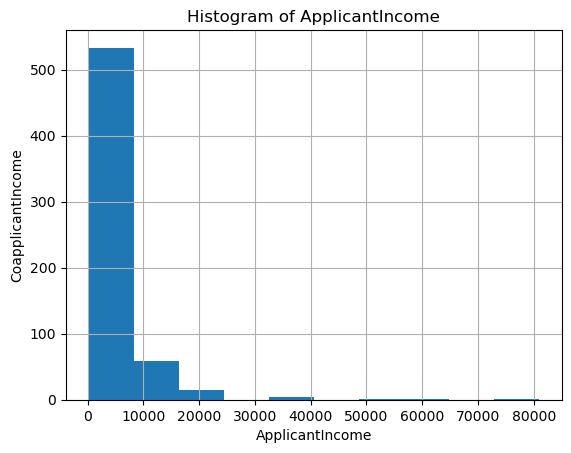

In [48]:
# convert "Start Date" column to datetime data type
# a['Loan_ID'] = pd.to_datetime(a['Loan_ID'])
# Histogram of a numerical column
column_name = 'ApplicantIncome'
a['ApplicantIncome'].hist()
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('Histogram of ' + 'ApplicantIncome')
plt.show()

In [47]:
a.nunique()


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome'>

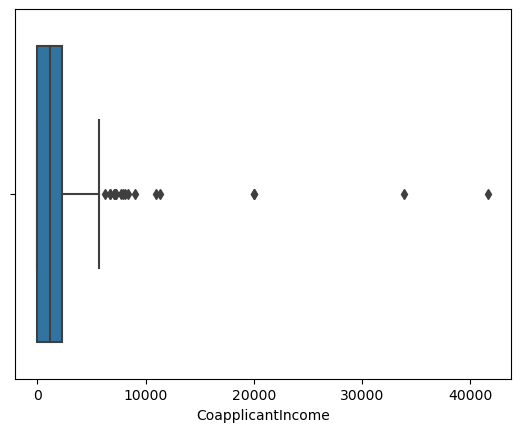

In [50]:
sns.boxplot(x='CoapplicantIncome', data=a)


Old Shape:  (596, 13)
New Shape:  (596, 13)


<AxesSubplot:xlabel='CoapplicantIncome'>

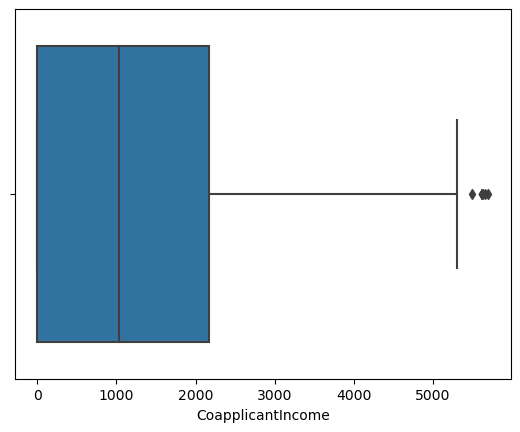

In [60]:
# IQR
Q1 = np.percentile(a['CoapplicantIncome'], 5,
                interpolation = 'midpoint')
 
Q3 = np.percentile(a['CoapplicantIncome'], 100,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", a.shape)
 
# Upper bound
upper = np.where(a['CoapplicantIncome'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(a['CoapplicantIncome'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
a.drop(upper[0], inplace = True)
a.drop(lower[0], inplace = True)
 
print("New Shape: ", a.shape)
 
sns.boxplot(x='CoapplicantIncome', data=a)



In [19]:
c=pd.read_csv('sample_sub.csv')


In [20]:
c

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [27]:
b=pd.read_csv('test.csv')
b

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [28]:
b.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
b.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object